In [1]:
import pandas as pd

In [5]:
file = pd.read_csv("/content/sample_data/spam.csv", encoding='latin-1')
file.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# inplace means resulting dataset replace the original one
file.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
file.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename colummns
file.rename(columns = {"v1" : "class", "v2" : "sms"}, inplace=True)
file.sample(5) # returns randome entries

,class,sms
3416,ham,But i haf enuff space got like 4 mb...
5126,ham,"To the wonderful Okors, have a great month. We..."
3264,spam,"44 7732584351, Do you want a New Nokia 3510i c..."
169,ham,Yes :)it completely in out of form:)clark also...
4848,ham,either way works for me. I am &lt;#&gt; year...


In [10]:
# grouping all record based on class feature. after that there will be duplicates
file.groupby("class").describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [15]:
# remove all the duplicate records - check the count and unique columns
# keep first means remove the all duplicates and keep only the first record of single type of record
file = file.drop_duplicates(keep='first')
file.groupby("class").describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [16]:
# create a new column named length in each and every record and assign the length of sms to each of it's
file["length"] = file["sms"].apply(len)
file.head(5)

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

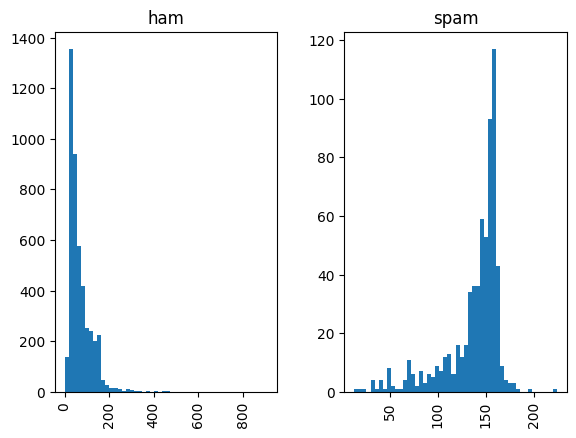

In [18]:
# represent a histogram based on length feature
file.hist(column="length", by="class", bins=50)

In [19]:
import nltk
from nltk.stem.porter import PorterStemmer

nltk.download("stopwords")
from nltk.corpus import stopwords

nltk.download("punkt")
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Preproccessing Tasks
* convert to lower case
* tokenize
* remove special characters
* remove stopwords and punctuations
* stemming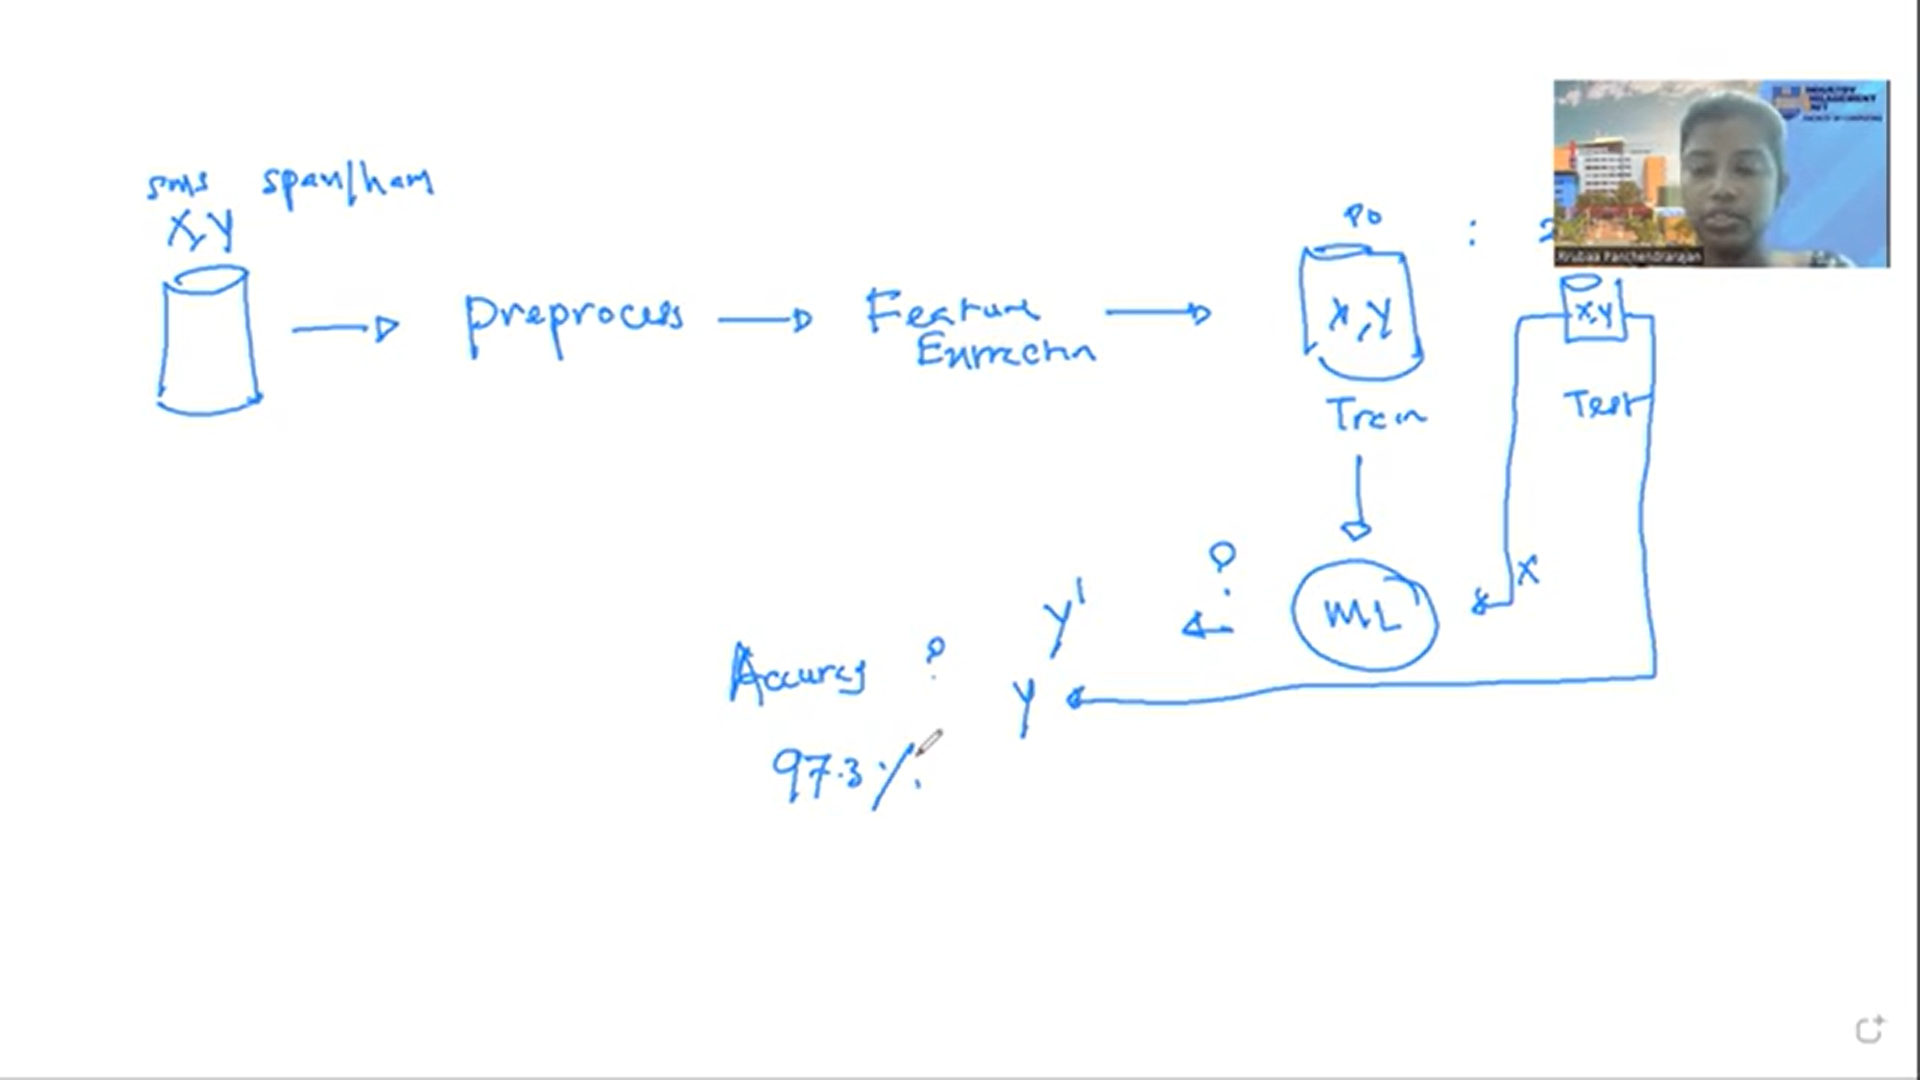

In [21]:
import string

# this function is to be used for take the whole sigle text(one sms) as once and clear the text according o preprocessing steps
def clear_text(text):

  text = text.lower()
  text = nltk.word_tokenize(text)
  # now text is list of words

  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in  string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [23]:
# create new column and store the cleaned text insi it in each row
file["cleaned_sms"] = file["sms"].apply(clear_text)
file.sample(5)

,class,sms,length,cleaned_sms
5230,ham,"Nope, I'm still in the market",29,nope still market
388,spam,4mths half price Orange line rental & latest c...,155,4mth half price orang line rental latest camer...
4933,ham,Hey do you want anything to buy:),33,hey want anyth buy
4134,ham,No need to say anything to me. I know i am an ...,54,need say anyth know outsid
5075,ham,"Well, i'm glad you didn't find it totally disa...",62,well glad find total disagre lol


# Feature Extraction

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(file["cleaned_sms"]).toarray()

(5169, 3000)

In [28]:
Y = file["class"].values
print(Y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


# Learning - Build and train model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

# feed only th e x data set to the models and let the model to predit corresponding y value
Y_pred = model.predict(X_test)

# measure the accuracy by comparing the predicted y values with testing y values which already we have
print(accuracy_score(Y_test, Y_pred))